In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Euler and Midpoint method solution

&lt;matplotlib.legend.Legend at 0x7f93f329cbd0&gt;

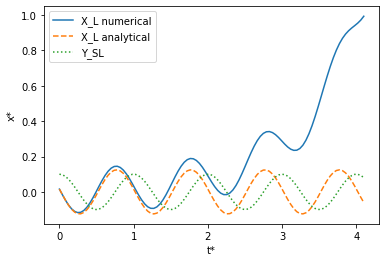

In [40]:
#Define Parameters
R_SS = 2.5 * 10**-5 #m/yr
P = 10**8 #yr
slope = 1./5000.
D = 2.5 * 10**5 # m
omega = 2.*pi/P 
psi = R_SS/(slope*D*omega)

#Set up solution arrays, timestep, and initial condition
nsteps = 100
dt = 0.041
t = arange(nsteps+1)*dt
x = zeros(nsteps+1)
x_ana = -1./sqrt(psi**2+1) * sin(2*pi*t - arctan(1/psi))
x[0] = x_ana[0] #0.

def dx_dt(t, x):
    return -2*pi*sin(2*pi*t) - 2*pi*psi*x

#Loop through the timesteps and calculate shoreline position for each time
for tstep in arange(nsteps):
    k_1 = dt * dx_dt(t[tstep], x[tstep])
    k_2 = dt * dx_dt(t[tstep] + 0.5*dt , x[tstep] + 0.5 * k_1)
    x[tstep+1] = x[tstep] + k_2
    
#Plot solution and sea level oscillations
A_SL = 0.1
Y_sl = A_SL*cos(2*pi*t)
plot(t, x)
plot(t, x_ana, '--')
plot(t, Y_sl, ':')
#xlim([0.5,1.])
#ylim([0.1, 0.14])
xlabel('t*')
ylabel('x*')
legend(['X_L numerical', 'X_L analytical', 'Y_SL'])


### 4th Order Runga-Kutta solution

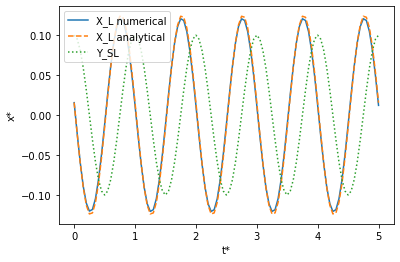

In [7]:
#Define Parameters
R_SS = 2.5 * 10**-5 #m/yr
P = 10**8 #yr
slope = 1./5000.
D = 2.5 * 10**5 # m
omega = 2.*pi/P 
psi = R_SS/(slope*D*omega)

#Set up solution arrays, timestep, and initial condition
nsteps = 100
dt = 0.05
t = arange(nsteps+1)*dt
x = zeros(nsteps+1)
x_ana = -1./sqrt(psi**2+1) * sin(2*pi*t - arctan(1/psi))
x[0] = x_ana[0] #0.

def dx_dt(t, x):
    return -2*pi*sin(2*pi*t) - 2*pi*psi*x

#Loop through the timesteps and calculate shoreline position for each time
for tstep in arange(nsteps):
    k_1 = dt * dx_dt(t[tstep], x[tstep])
    k_2 = dt * dx_dt(t[tstep] + 0.5*dt, x[tstep] + 0.5 * k_1)
    k_3 = dt * dx_dt(t[tstep] + 0.5*dt, x[tstep] + 0.5*k_2)
    k_4 = dt * dx_dt(t[tstep] + dt, x[tstep] + k_3 )
    x[tstep+1] = x[tstep] + k_1/6.0 + k_2/3.0 + k_3/3.0 + k_4/6.0
    

#Plot solution and sea level oscillations
A_SL = 0.1
Y_sl = A_SL*cos(2*pi*t)
plot(t, x)
plot(t, x_ana, '--')
plot(t, Y_sl, ':')
#xlim([0.5,1.])
#ylim([0.1, 0.14])
xlabel('t*')
ylabel('x*')
legend(['X_L numerical', 'X_L analytical', 'Y_SL'])

Matt


### Solution using odeint()

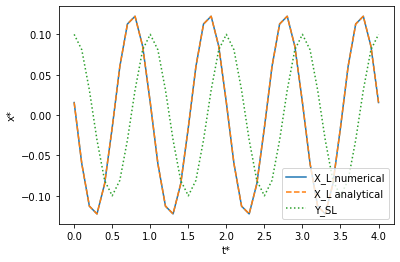

In [8]:
from scipy.integrate import odeint
#Define Parameters
R_SS = 2.5 * 10**-5 #m/yr
P = 10**8 #yr
slope = 1./5000.
D = 2.5 * 10**5 # m
omega = 2.*pi/P 
psi = R_SS/(slope*D*omega)

#Set up solution arrays, timestep, and initial condition
nsteps = 40
dt = 0.1
t = arange(nsteps+1)*dt
x = zeros(nsteps+1)
x_ana = -1./sqrt(psi**2+1) * sin(2*pi*t - arctan(1/psi))
x[0] = x_ana[0] #0.

def dx_dt(x, t, Psi):
    return -2*pi*sin(2*pi*t) - 2*pi*Psi*x

x_sol = odeint(dx_dt, x[0], t, args=(psi,) )

#Plot solution and sea level oscillations
A_SL = 0.1
Y_sl = A_SL*cos(2*pi*t)
plot(t, x_sol)
plot(t, x_ana, '--')
plot(t, Y_sl, ':')
#xlim([0.5,1.])
#ylim([0.1, 0.14])
xlabel('t*')
ylabel('x*')
legend(['X_L numerical', 'X_L analytical', 'Y_SL'])